In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("profiles.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum() / len(df)

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# set therosold value(missing value <=35%)

In [6]:
df.drop(['diet','pets','offspring'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 28 columns):
age            59946 non-null int64
body_type      54650 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
orientation    59946 non-null object
religion       39720 non-null object
sex            59946 non-null object
sign

In [8]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols
categ_cols=list(set(cols) - set(num_cols))

In [9]:
categ_cols

['orientation',
 'essay1',
 'essay3',
 'essay7',
 'sex',
 'speaks',
 'status',
 'religion',
 'essay2',
 'essay5',
 'education',
 'body_type',
 'essay9',
 'job',
 'essay4',
 'drugs',
 'location',
 'essay0',
 'essay6',
 'smokes',
 'drinks',
 'sign',
 'ethnicity',
 'last_online',
 'essay8']

In [10]:
cols

Index(['age', 'body_type', 'drinks', 'drugs', 'education', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8',
       'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [11]:
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)
df['drinks'].fillna(df['drinks'].mode()[0], inplace=True)
df['drugs'].fillna(df['drugs'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['ethnicity'].fillna(df['ethnicity'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['religion'].fillna(df['religion'].mode()[0], inplace=True)
df['sign'].fillna(df['sign'].mode()[0], inplace=True)
df['smokes'].fillna(df['smokes'].mode()[0], inplace=True)
df['speaks'].fillna(df['speaks'].mode()[0], inplace=True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 28 columns):
age            59946 non-null int64
body_type      59946 non-null object
drinks         59946 non-null object
drugs          59946 non-null object
education      59946 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      59946 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            59946 non-null object
last_online    59946 non-null object
location       59946 non-null object
orientation    59946 non-null object
religion       59946 non-null object
sex            59946 non-null object
sign

In [336]:
df.isnull().sum() / len(df)

age            0.000000
body_type      0.000000
drinks         0.000000
drugs          0.000000
education      0.000000
essay0         0.091549
essay1         0.126314
essay2         0.160778
essay3         0.191439
essay4         0.175775
essay5         0.180996
essay6         0.229723
essay7         0.207704
essay8         0.320705
essay9         0.210239
ethnicity      0.000000
height         0.000050
income         0.000000
job            0.000000
last_online    0.000000
location       0.000000
orientation    0.000000
religion       0.000000
sex            0.000000
sign           0.000000
smokes         0.000000
speaks         0.000000
status         0.000000
dtype: float64

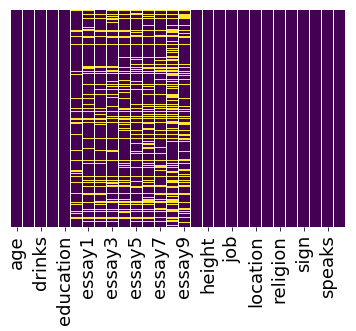

In [337]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.head()

In [338]:
df.columns

Index(['age', 'body_type', 'drinks', 'drugs', 'education', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8',
       'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [12]:
cols= ['body_type', 'drinks', 'drugs', 'education', 'ethnicity', 'job',
       'location', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status']

In [13]:
cols

['body_type',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'location',
 'orientation',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [14]:
def dummy(df,col):
    drop = np.unique(df[col])[-1]
    dummy = pd.get_dummies(df[col])
    new_col = []
    for i in dummy.columns:
        new_col.append(col+'_'+str(i))
    dummy.columns = new_col
    df = pd.concat([df, dummy], axis=1)
    df.drop([col, new_col[-1]], inplace=True, axis=1)
    return df

In [15]:
empty = []
for col in cols:
    try:
        df = dummy(df,col)
    except:
        empty.append(col)

In [16]:
print(df.columns)

Index(['age', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',
       'essay6', 'essay7', 'essay8',
       ...
       'speaks_english, yiddish (poorly), english (fluently)',
       'speaks_english, yiddish (poorly), spanish (okay)',
       'speaks_english, yiddish (poorly), spanish (okay), latin (poorly)',
       'speaks_english, yiddish (poorly), spanish (poorly)',
       'speaks_french (fluently), german (fluently), spanish (fluently), english',
       'speaks_french (okay), english', 'status_available', 'status_married',
       'status_seeing someone', 'status_single'],
      dtype='object', length=8245)


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Columns: 8245 entries, age to status_single
dtypes: float64(1), int64(2), object(11), uint8(8231)
memory usage: 477.0+ MB


In [17]:
df_essay=df[['essay0', 'essay1','essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8','essay9']]

In [18]:
df.drop(['essay0', 'essay1','essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8','essay9'],axis=1,inplace=True)

In [20]:
df.drop(["last_online"],axis=1,inplace=True)

KeyError: "['last_online'] not found in axis"

Date formating

online=[]
for i in range(59943):
a=modifiedDataset.last_online[i]
online.append(datetime.strptime(a,'%Y-%m-%d-%H-%M'))
modifiedDataset = modifiedDataset.drop(['last_online'], axis = 1)
modifiedDataset['last_online'] = online
"""
modifiedDataset['last_online']= pd.to_datetime(modifiedDataset['last_online'])
modifiedDataset['year'] = modifiedDataset['last_online'].dt.year
modifiedDataset['month'] = modifiedDataset['last_online'].dt.month
modifiedDataset['day'] = modifiedDataset['last_online'].dt.day
modifiedDataset['hour'] = modifiedDataset['last_online'].dt.hour
modifiedDataset['minute'] = modifiedDataset['last_online'].dt.minute
modifiedDataset = modifiedDataset.drop(['last_online'], axis = 1)

In [348]:
df.head()

,age,height,income,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,"speaks_english, yiddish (poorly), english (fluently)","speaks_english, yiddish (poorly), spanish (okay)","speaks_english, yiddish (poorly), spanish (okay), latin (poorly)","speaks_english, yiddish (poorly), spanish (poorly)","speaks_french (fluently), german (fluently), spanish (fluently), english","speaks_french (okay), english",status_available,status_married,status_seeing someone,status_single
0,22,75.0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,35,70.0,80000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,68.0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,23,71.0,20000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29,66.0,-1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


df_scaled = scaler.fit_transform(df)



In [22]:
df_scaled1 = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled1

,age,height,income,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,"speaks_english, yiddish (poorly), english (fluently)","speaks_english, yiddish (poorly), spanish (okay)","speaks_english, yiddish (poorly), spanish (okay), latin (poorly)","speaks_english, yiddish (poorly), spanish (poorly)","speaks_french (fluently), german (fluently), spanish (fluently), english","speaks_french (okay), english",status_available,status_married,status_seeing someone,status_single
0,0.043478,0.787234,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.184783,0.734043,0.080001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.217391,0.712766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.054348,0.744681,0.020001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.119565,0.691489,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.119565,0.702128,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.152174,0.680851,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.141304,0.680851,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.065217,0.702128,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.206522,0.680851,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# thresold value=0.035

In [31]:
df_sub = df.iloc[:,(df_scaled1.var() > 0.035).values]

In [32]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 46 columns):
body_type_a little extra                             59946 non-null uint8
body_type_athletic                                   59946 non-null uint8
body_type_average                                    59946 non-null uint8
body_type_curvy                                      59946 non-null uint8
body_type_fit                                        59946 non-null uint8
body_type_thin                                       59946 non-null uint8
drinks_not at all                                    59946 non-null uint8
drinks_often                                         59946 non-null uint8
drinks_rarely                                        59946 non-null uint8
drinks_socially                                      59946 non-null uint8
drugs_never                                          59946 non-null uint8
education_graduated from college/university          59946 non-null uint8
edu

In [33]:
print(df_sub.columns)

Index(['body_type_a little extra', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_thin',
       'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drugs_never', 'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_hispanic / latin', 'ethnicity_white',
       'job_artistic / musical / writer',
       'job_banking / financial / real estate',
       'job_computer / hardware / software', 'job_education / academia',
       'job_entertainment / media', 'job_executive / management',
       'job_medicine / health', 'job_other', 'job_sales / marketing / biz dev',
       'job_science / tech / engineering', 'job_student',
       'location_berkeley, california', 'location_oakland, california',
       'location_san francisco, california', 'orientation_bisexual',
       'orientation_gay', 'r

In [34]:
df_sub.shape

(59946, 46)

In [35]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_sub)
    kmeanModel.fit(df_sub)
    distortions.append(sum(np.min(cdist(df_sub, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_sub.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



KeyboardInterrupt: 

In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(df_sub)
kmeanModel.fit(df_sub)

In [ ]:
df_sub['cluster'] = kmeanModel.labels_

In [ ]:
df_sub[df_sub['cluster']==0].describe()

In [ ]:
df_sub[df_sub['cluster']==1].describe() 

In [ ]:
df_sub[df_sub['cluster']==2].describe() 

In [ ]:
df_sub[df_sub['cluster']==3].describe() 

In [ ]:
df_sub[df_sub['cluster']==4].describe() 

In [ ]:
df_desc = df_sub[df_sub['cluster']==0].describe().append(df_sub[df_sub['cluster']==1].describe()).append(df_sub[df_sub['cluster']==2].describe()).append(df_sub[df_sub['cluster']==3].describe()).append(df_sub[df_sub['cluster']==4].describe()) 

In [ ]:
df_desc

# 2nd thresold value=0.05

In [300]:
df_sub1 = df.iloc[:,(df_scaled1.var() > 0.05).values]
df_sub1.info()

NameError: name 'df_scaled1' is not defined

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_sub1)
    kmeanModel.fit(df_sub1)
    distortions.append(sum(np.min(cdist(df_sub1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_sub1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [ ]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_sub1)

In [ ]:
df_sub1['cluster'] = kmeanModel.labels_

In [ ]:
df_sub1[df_sub1['cluster']==0].describe()

In [ ]:
df_sub1[df_sub1['cluster']==1].describe()

# 3rd thresold value=0.45

In [ ]:
df_sub2 = df.iloc[:,(df_scaled1.var() > 0.045).values]
df_sub2.info()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_sub2)
    kmeanModel.fit(df_sub2)
    distortions.append(sum(np.min(cdist(df_sub2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_sub2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



# 4th thresold value=0.6

In [23]:
df_sub3 = df.iloc[:,(df_scaled1.var() > 0.06).values]
df_sub3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
body_type_athletic                               59946 non-null uint8
body_type_average                                59946 non-null uint8
body_type_curvy                                  59946 non-null uint8
body_type_fit                                    59946 non-null uint8
body_type_thin                                   59946 non-null uint8
drinks_often                                     59946 non-null uint8
drinks_rarely                                    59946 non-null uint8
drinks_socially                                  59946 non-null uint8
drugs_never                                      59946 non-null uint8
education_graduated from college/university      59946 non-null uint8
education_graduated from masters program         59946 non-null uint8
education_working on college/university          59946 non-null uint8
ethnicity_asian                                  59

In [24]:
df_sub3.to_csv('final_dataset1.csv')

In [25]:
df_sub3.columns

Index(['body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_thin', 'drinks_often', 'drinks_rarely',
       'drinks_socially', 'drugs_never',
       'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_white', 'job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_other',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       'job_student', 'location_berkeley, california',
       'location_oakland, california', 'location_san francisco, california',
       'orientation_gay', 'religion_agnosticism', 'sex_f',
       'sign_gemini and it&rsquo;s fun to think about', 'smokes_no',
       'speaks_english', 'speaks_english (fluently)', 'status_single'],
      dtype='object')

In [3]:
df_sub3 = pd.read_csv('final_dataset1.csv')

NameError: name 'pd' is not defined

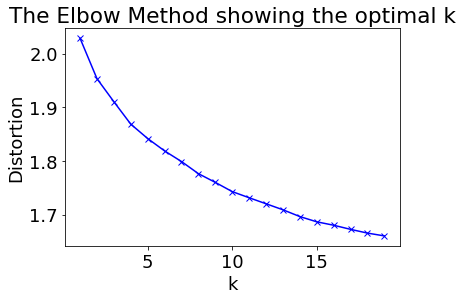

In [352]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_sub3)
    kmeanModel.fit(df_sub3)
    distortions.append(sum(np.min(cdist(df_sub3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_sub3.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [354]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df_sub3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [355]:
df_sub3['cluster'] = kmeanModel.labels_

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_sub3.to_csv('dating_6.csv')

In [ ]:
df_sub3[df_sub3['cluster']==0].describe()

In [ ]:
df_sub3[df_sub3['cluster']==1].describe() 

In [ ]:
df_sub3[df_sub3['cluster']==2].describe() 

In [ ]:
df_sub3[df_sub3['cluster']==3].describe() 

In [ ]:
df_sub3[df_sub3['cluster']==4].describe() 

In [ ]:
import matplotlib.pyplot as plt

In [353]:
df_sub3.columns

Index(['body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_thin', 'drinks_often', 'drinks_rarely',
       'drinks_socially', 'drugs_never',
       'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_white', 'job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_other',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       'job_student', 'location_berkeley, california',
       'location_oakland, california', 'location_san francisco, california',
       'orientation_gay', 'religion_agnosticism', 'sex_f',
       'sign_gemini and it&rsquo;s fun to think about', 'smokes_no',
       'speaks_english', 'speaks_english (fluently)', 'status_single'],
      dtype='object')

In [356]:
df_mean = df_sub3.groupby('cluster').mean()*100
df_mean = df_mean.round(2)
df_mean

,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_thin,drinks_often,drinks_rarely,drinks_socially,drugs_never,education_graduated from college/university,...,"location_oakland, california","location_san francisco, california",orientation_gay,religion_agnosticism,sex_f,sign_gemini and it&rsquo;s fun to think about,smokes_no,speaks_english,speaks_english (fluently),status_single
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,100.00,0.00,3.07,1.21,89.73,89.88,52.68,...,10.54,58.46,8.63,42.34,34.92,24.11,88.70,34.99,9.58,95.04
1,0.00,100.00,0.00,0.00,0.00,0.00,0.00,98.34,88.35,54.46,...,11.64,52.16,9.68,42.89,43.43,22.36,82.54,38.71,11.08,92.70
2,99.96,0.00,0.00,0.00,0.00,3.95,2.50,87.63,90.57,53.67,...,9.09,56.70,7.77,44.42,18.15,26.12,88.65,39.52,8.76,96.01
3,9.67,40.19,7.77,13.37,9.88,35.74,45.09,0.00,79.07,44.71,...,14.61,43.39,10.70,25.93,41.38,16.84,74.30,32.98,13.19,89.58
4,0.04,0.00,27.12,0.00,31.95,0.00,0.00,98.56,84.51,49.18,...,14.03,49.40,9.34,35.82,61.38,17.98,79.00,36.02,12.34,91.80


In [357]:
df_mean.columns

Index(['body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_thin', 'drinks_often', 'drinks_rarely',
       'drinks_socially', 'drugs_never',
       'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_white', 'job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_other',
       'job_sales / marketing / biz dev', 'job_science / tech / engineering',
       'job_student', 'location_berkeley, california',
       'location_oakland, california', 'location_san francisco, california',
       'orientation_gay', 'religion_agnosticism', 'sex_f',
       'sign_gemini and it&rsquo;s fun to think about', 'smokes_no',
       'speaks_english', 'speaks_english (fluently)', 'status_single'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


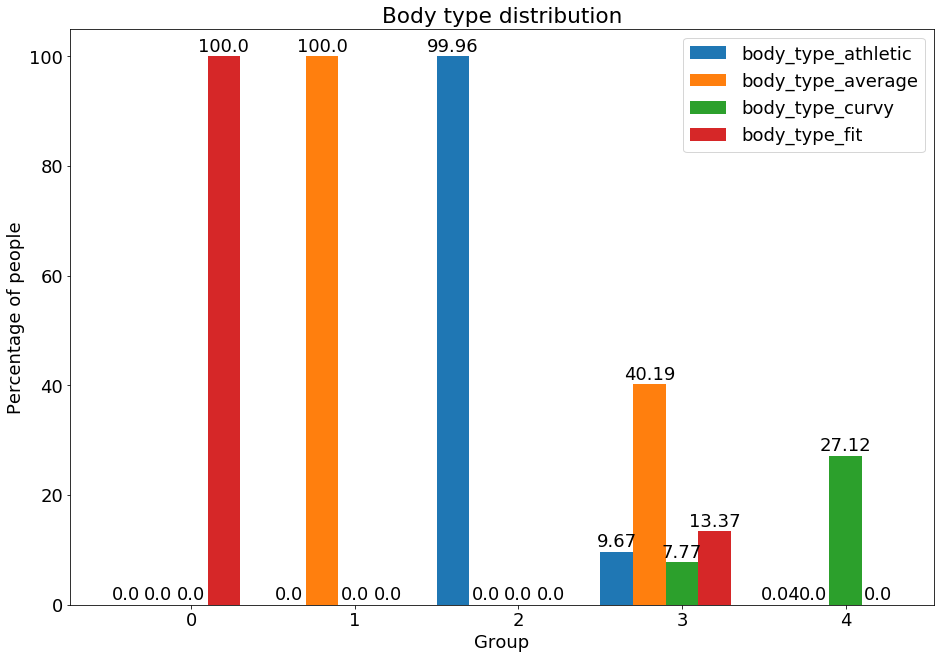

In [358]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

#fig, ax = plt.subplots()

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

rects1 = ax.bar(x - width*2, df_mean['body_type_athletic'],  width, label='body_type_athletic')
rects2 = ax.bar(x - width, df_mean['body_type_average'],  width, label='body_type_average')
rects3 = ax.bar(x , df_mean['body_type_curvy'],  width, label='body_type_curvy')
rects4 = ax.bar(x + width, df_mean['body_type_fit'],  width, label='body_type_fit')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Body type distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() 
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)



fig.tight_layout()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


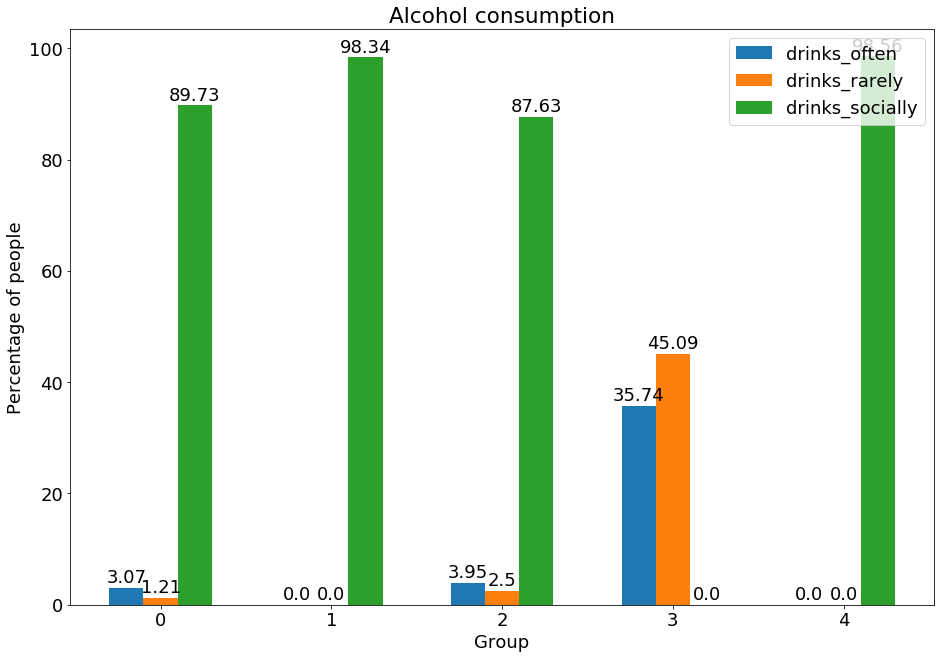

In [359]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

rects1 = ax.bar(x - width, df_mean['drinks_often'],  width, label='drinks_often')
rects2 = ax.bar(x , df_mean['drinks_rarely'],  width, label='drinks_rarely')
rects3 = ax.bar(x + width, df_mean['drinks_socially'],  width, label='drinks_socially')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Alcohol consumption')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



fig.tight_layout()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


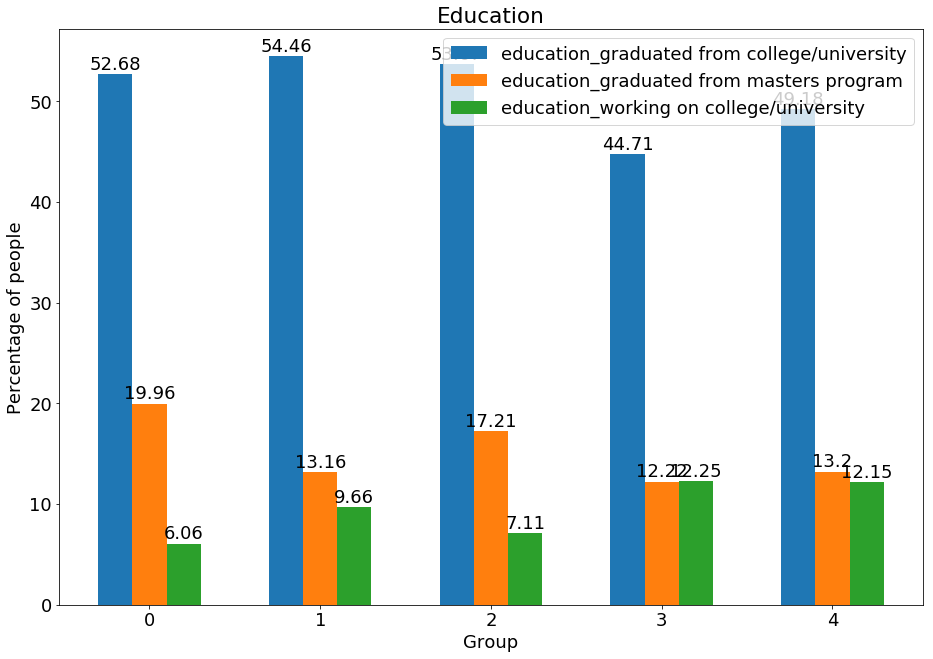

In [361]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

rects1 = ax.bar(x - width, df_mean['education_graduated from college/university'],  width, label='education_graduated from college/university')
rects2 = ax.bar(x , df_mean['education_graduated from masters program'],  width, label='education_graduated from masters program')
rects3 = ax.bar(x + width, df_mean['education_working on college/university'],  width, label='education_working on college/university')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



fig.tight_layout()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


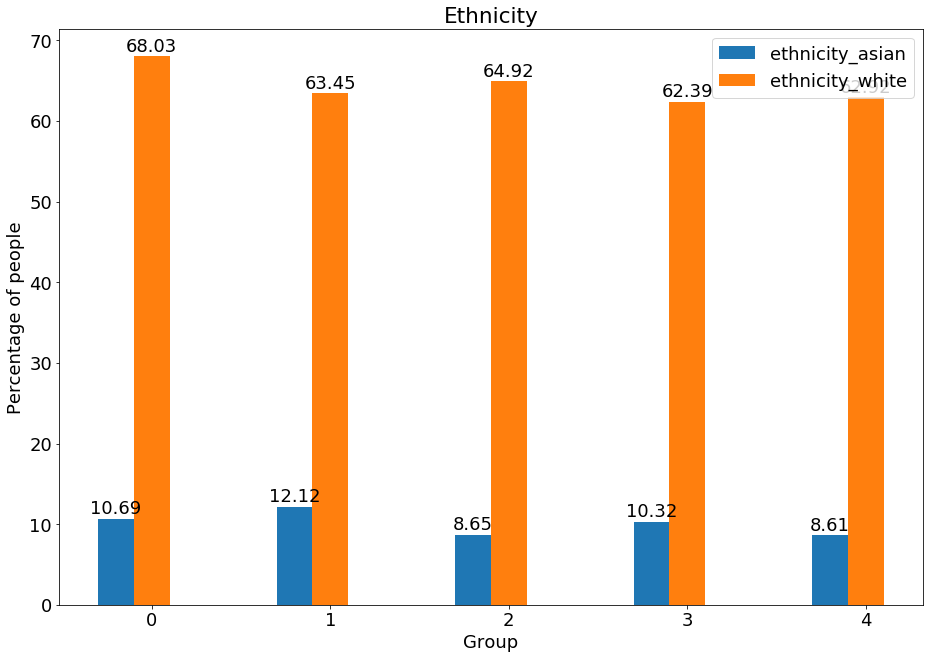

In [362]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])


rects1 = ax.bar(x - width, df_mean['ethnicity_asian'],  width, label='ethnicity_asian')
rects2 = ax.bar(x , df_mean['ethnicity_white'],  width, label='ethnicity_white')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

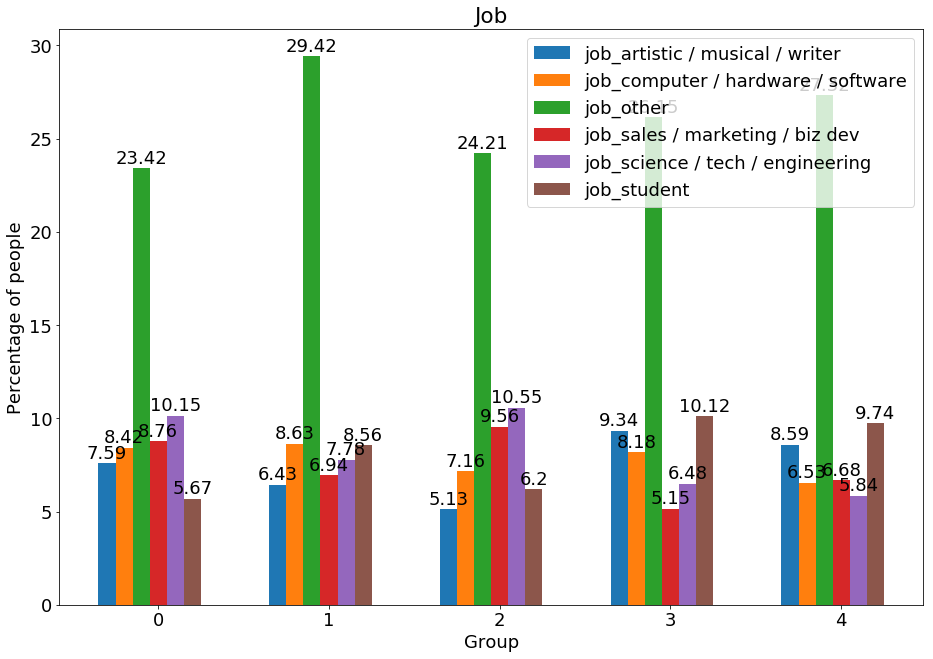

In [363]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])


rects1 = ax.bar(x - width*3, df_mean['job_artistic / musical / writer'],  width, label='job_artistic / musical / writer')
rects2 = ax.bar(x - width*2, df_mean['job_computer / hardware / software'],  width, label='job_computer / hardware / software')
rects3 = ax.bar(x - width, df_mean['job_other'],  width, label='job_other')
rects4 = ax.bar(x , df_mean['job_sales / marketing / biz dev'],  width, label='job_sales / marketing / biz dev')
rects5 = ax.bar(x + width, df_mean['job_science / tech / engineering'],  width, label='job_science / tech / engineering')
rects6 = ax.bar(x + width*2, df_mean['job_student'],  width, label='job_student')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Job')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)



#fig.tight_layout()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


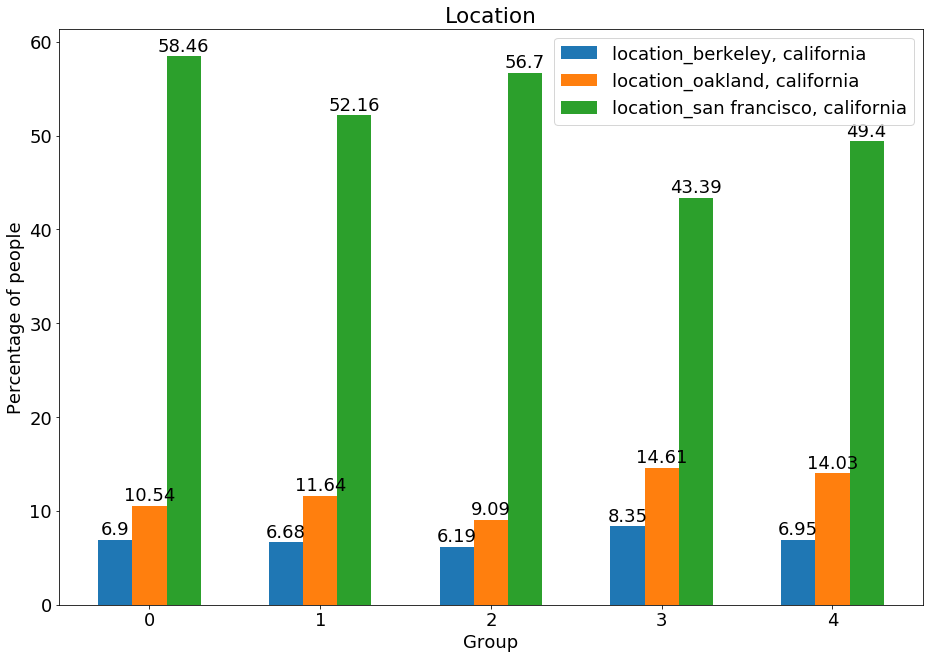

In [364]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])



rects1 = ax.bar(x - width, df_mean['location_berkeley, california'],  width, label='location_berkeley, california')
rects2 = ax.bar(x , df_mean['location_oakland, california'],  width, label='location_oakland, california')
rects3 = ax.bar(x + width, df_mean['location_san francisco, california'],  width, label='location_san francisco, california')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


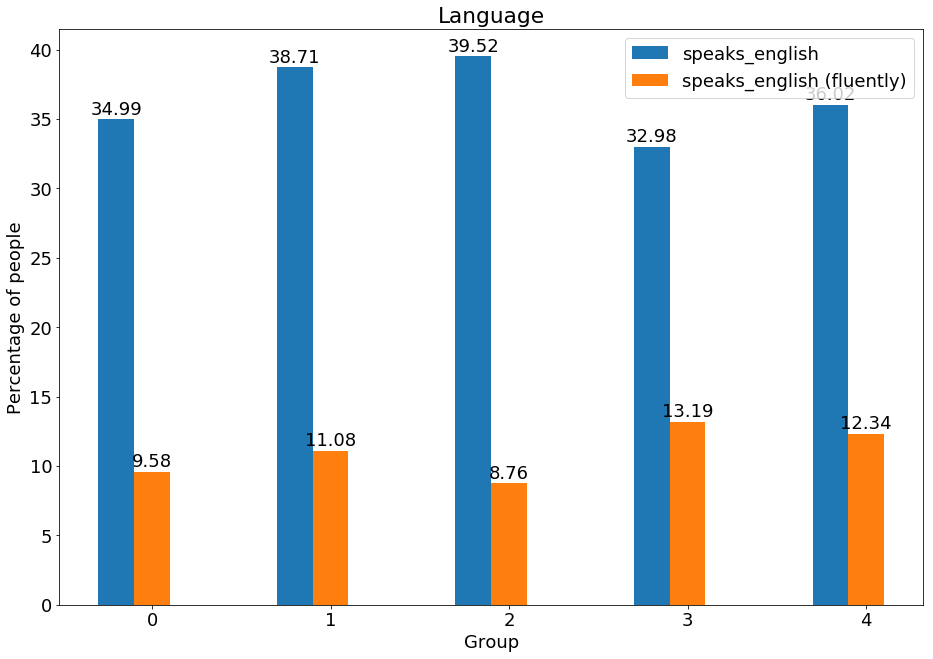

In [365]:
labels = df_mean.index

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])



rects1 = ax.bar(x - width, df_mean['speaks_english'],  width, label='speaks_english')
rects2 = ax.bar(x , df_mean['speaks_english (fluently)'],  width, label='speaks_english (fluently)')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Group')
ax.set_title('Language')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)



fig.tight_layout()

plt.show()

In [ ]:
# Training logistic regression model to classify users into groups 

In [7]:
#define X,y
df_sub1 = pd.read_csv('dataset1.csv')
X = df_sub1.iloc[:,0:-1].values
y = df_sub1['cluster'].values

In [8]:
y = y.reshape((-1,1))
X.shape, y.shape, y

((59946, 36), (59946, 1), array([[0],
        [2],
        [0],
        ...,
        [2],
        [0],
        [3]]))

In [37]:
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                          random_state=42, 
                                                          test_size=0.15)

In [38]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model.fit(X_train, y_train)

Accuracy: 0.225 (0.007)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.score(X_test, y_test)

0.23387455516014236

In [9]:
#Neural network to predict cluster

In [23]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,  
                                                          random_state=42, 
                                                          test_size=0.2)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
dummy_y, y_train

(array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], dtype=float32), array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], dtype=float32))

In [15]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset



# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=128)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 45        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50954/50954 [==============================] - 3s 49us/step - loss: 11.1948 - accuracy: 0.2043
Epoch 2/50
50954/50954 [==============================] - 1s 26us/step - loss: 11.1019 - accuracy: 0.2039
Epoch 3/50
50954/50954 [==============================] - 1s 26us/step - loss: 7.7422 - accuracy: 0.2201
Epoch 4/50
50954/50954 [==============================] - 1s 25us/ste

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [30]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset



# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=32, activation='relu'))
    model.add(Dense(16, activation='relu'))
#    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [ ]:
model = baseline_model()
model.summary()
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=64)


In [29]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

11990/11990 [==============================] - 1s 61us/step
Accuracy: 23.04


In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, verbose =3)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
  
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 
  
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


0.2640533778148457


In [12]:
print(knn.predict(X_test[1:2])) 

[1]


In [290]:
# Recommendation system visualisation

In [94]:
def get_recommendation(user_id):
    dist = []
    cluster = df_sub1[df_sub1.index == user_id]['cluster']
    for i in df_sub1[df_sub1['cluster'] == cluster.values[0]].index:
        dist += [[i,np.linalg.norm(np.array(df_sub1[df_sub1.index == user_id])[0][1:-1]-np.array(df_sub1[df_sub1.index == i])[0][1:-1])]]    
    df = pd.DataFrame(data = dist,columns = ['id', 'dist'])
    df = df.sort_values('dist')
    return df

In [95]:
df = get_recommendation(1)

In [205]:
df_sub1[df_sub1.index == df['id'].values[1]]

,Unnamed: 0,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_thin,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,...,orientation_gay,religion_agnosticism,sex_f,sign_gemini and it&rsquo;s fun to think about,smokes_no,smokes_sometimes,speaks_english,speaks_english (fluently),status_single,cluster
41678,41678,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,2


In [234]:
df_pred = df_sub1[df_sub1.index == df['id'].values[0]]

for i in range(1,5):
    df_w = df_sub1[df_sub1.index == df['id'].values[i]]
    df_pred = df_pred.append(df_w)

In [244]:
df_pred.columns

Index(['Unnamed: 0', 'body_type_athletic', 'body_type_average',
       'body_type_curvy', 'body_type_fit', 'body_type_thin',
       'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drugs_never', 'education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'ethnicity_asian',
       'ethnicity_white', 'job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_education / academia',
       'job_medicine / health', 'job_other', 'job_sales / marketing / biz dev',
       'job_science / tech / engineering', 'job_student',
       'location_berkeley, california', 'location_oakland, california',
       'location_san francisco, california', 'orientation_gay',
       'religion_agnosticism', 'sex_f',
       'sign_gemini and it&rsquo;s fun to think about', 'smokes_no',
       'smokes_sometimes', 'speaks_english', 'speaks_english (fluently)',
       'status_

In [236]:
df_pred['Unnamed: 0'] = df_pred['Unnamed: 0'].astype(str)

In [281]:
df_pred['body_type_other'] = [0,1,0,0,1]
df_pred['drugs_sometimes'] = [1,1,0,1,1]
df_pred['education_other'] = [1,1,1,1,1]
df_pred['job_other'] = [1,1,1,1,1]
df_pred['smokes_often'] = [0,0,0,0,0]
df_pred['does_not_speak_english'] = [1,1,1,0,1]
df_pred['status_comitted'] = [0,0,0,0,0]

In [248]:
df_pred

,Unnamed: 0,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_thin,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,...,religion_agnosticism,sex_f,sign_gemini and it&rsquo;s fun to think about,smokes_no,smokes_sometimes,speaks_english,speaks_english (fluently),status_single,cluster,body_type_other
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,2,0
41678,41678,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,2,1
12224,12224,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,2,0
7091,7091,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,2,0
10255,10255,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,2,1


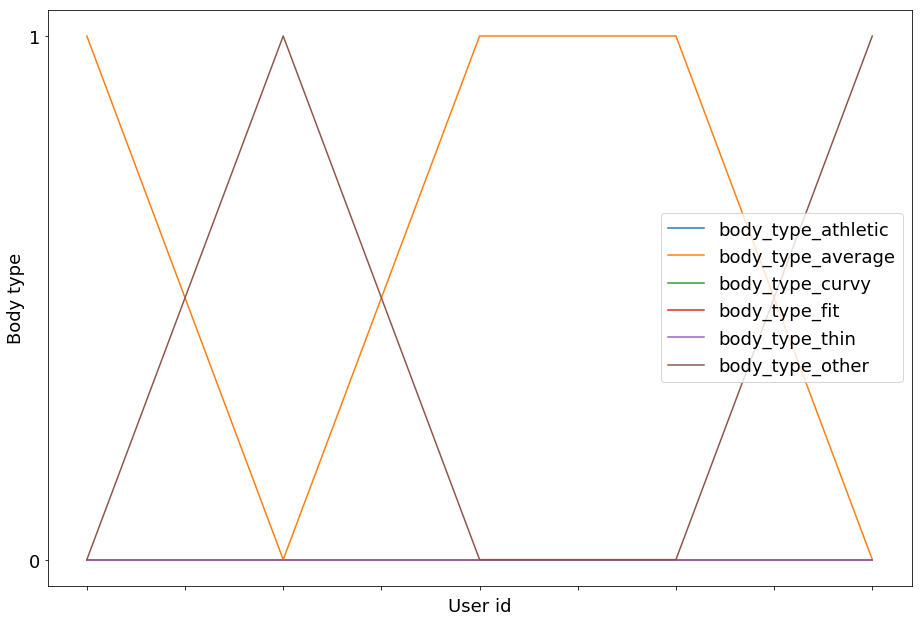

In [320]:
import matplotlib.pyplot as plt
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['body_type_athletic', 'body_type_average', 'body_type_curvy', 
                                'body_type_fit', 'body_type_thin', 'body_type_other'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Body type')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

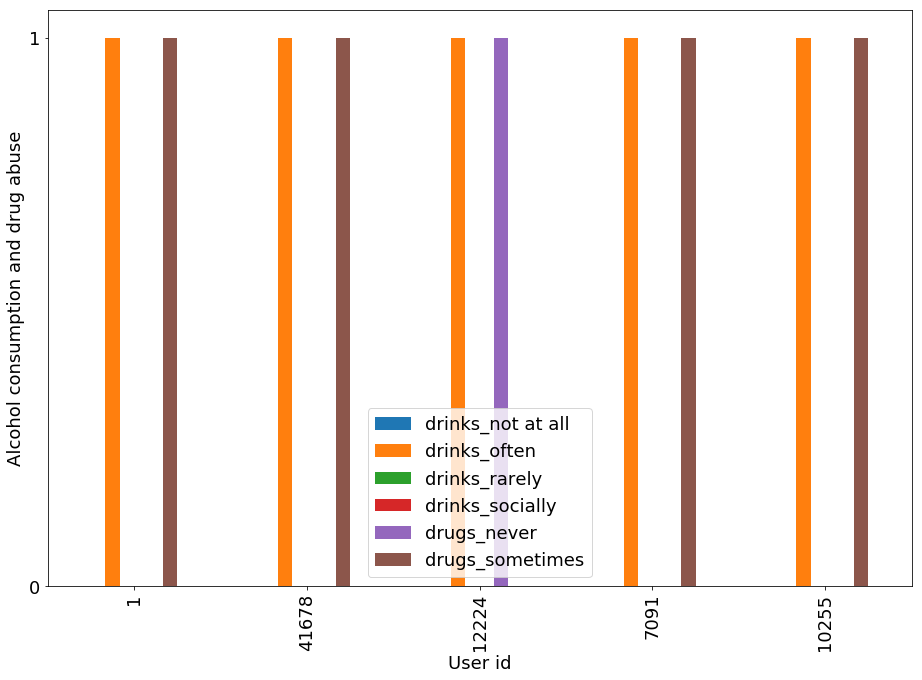

In [322]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['drinks_not at all', 'drinks_often', 'drinks_rarely', 
                                'drinks_socially', 'drugs_never', 'drugs_sometimes'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Alcohol consumption and drug abuse')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

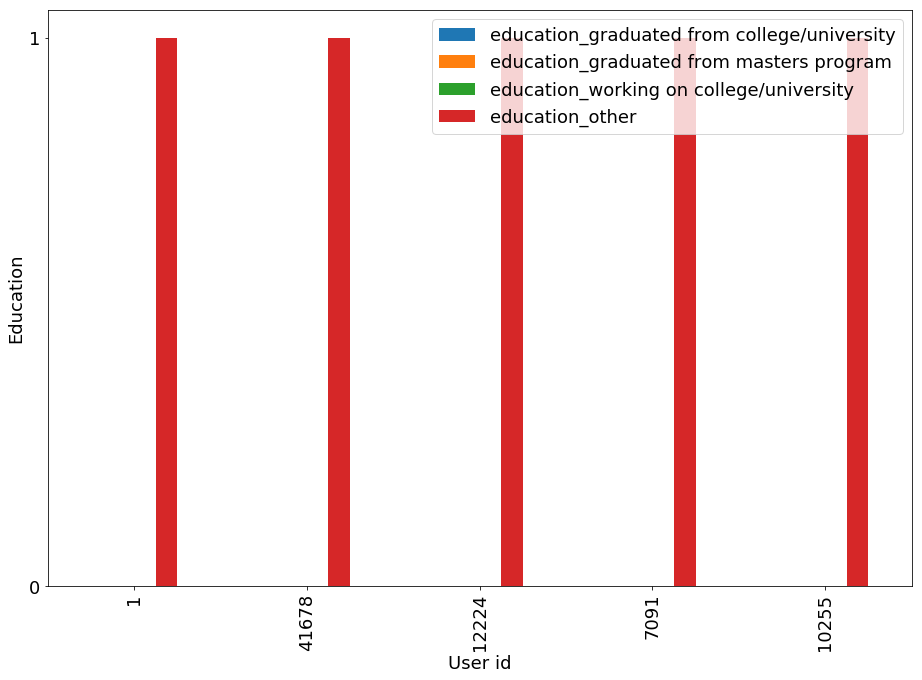

In [311]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['education_graduated from college/university',
       'education_graduated from masters program',
       'education_working on college/university', 'education_other'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Education')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

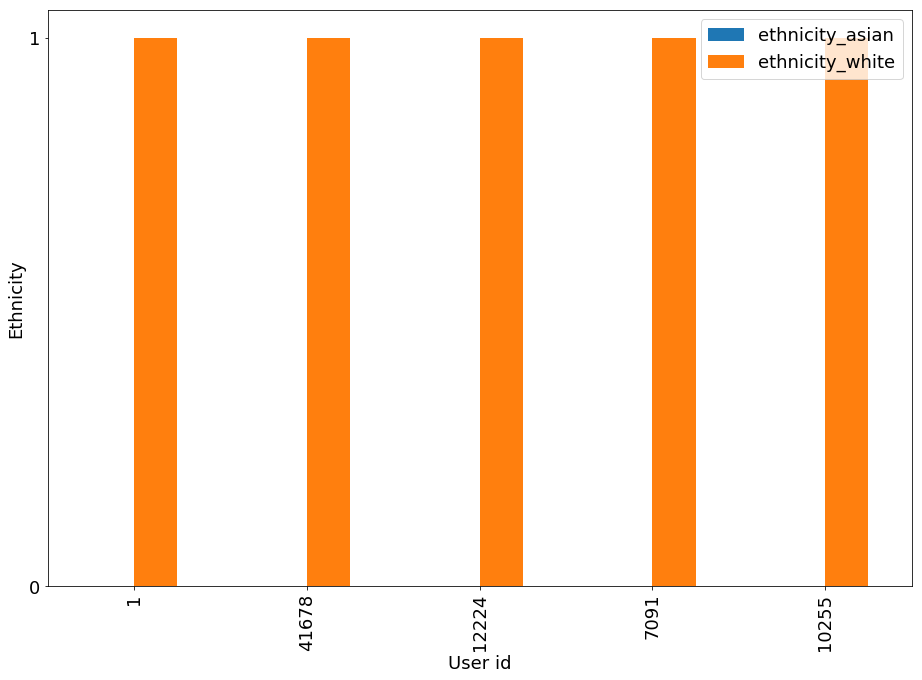

In [312]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['ethnicity_asian',
       'ethnicity_white'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Ethnicity')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

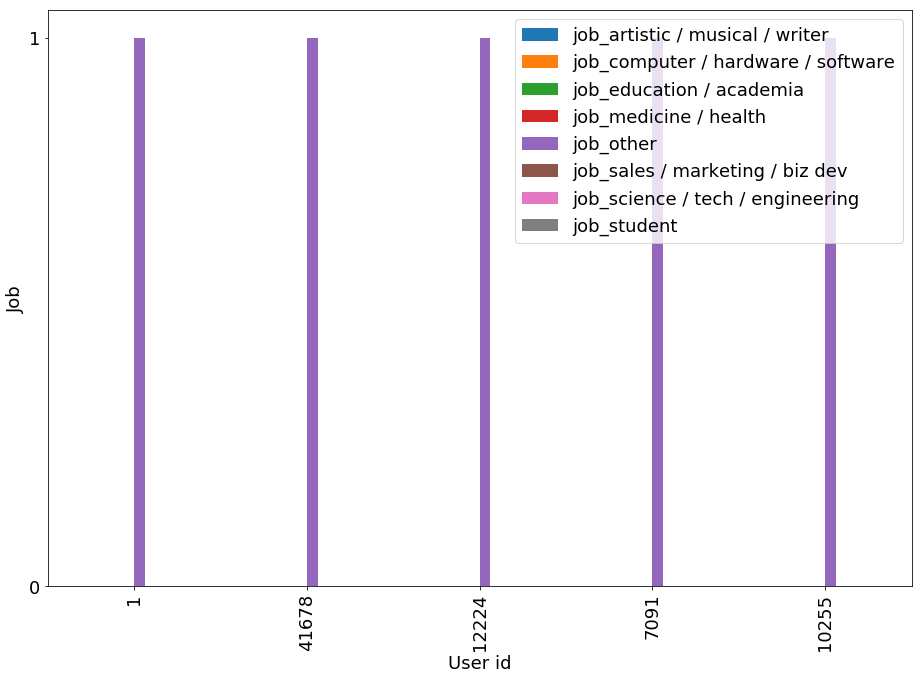

In [313]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['job_artistic / musical / writer',
       'job_computer / hardware / software', 'job_education / academia',
       'job_medicine / health', 'job_other', 'job_sales / marketing / biz dev',
       'job_science / tech / engineering', 'job_student'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Job')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

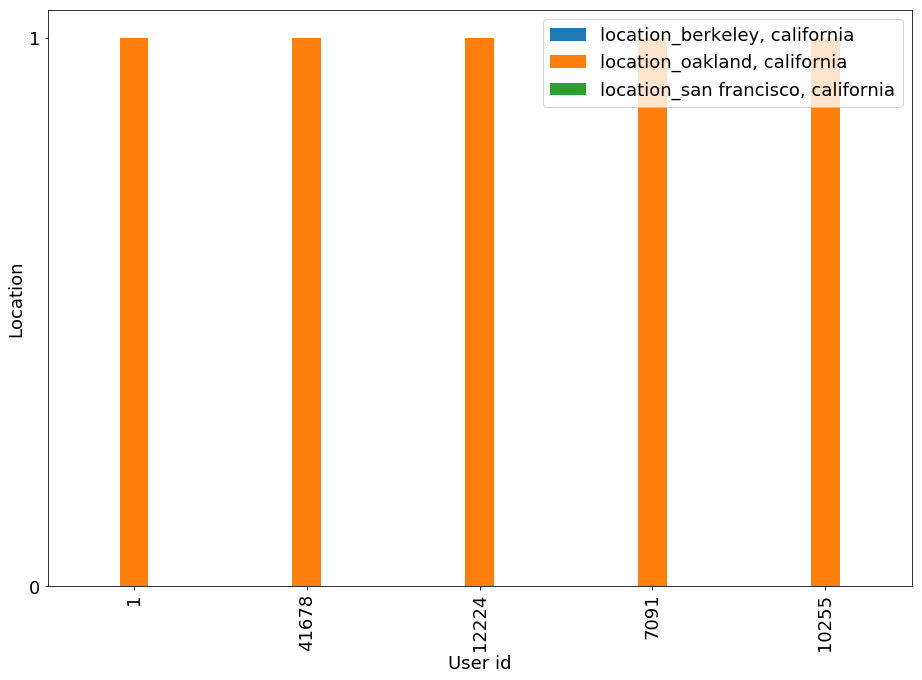

In [314]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['location_berkeley, california', 'location_oakland, california',
       'location_san francisco, california'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Location')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

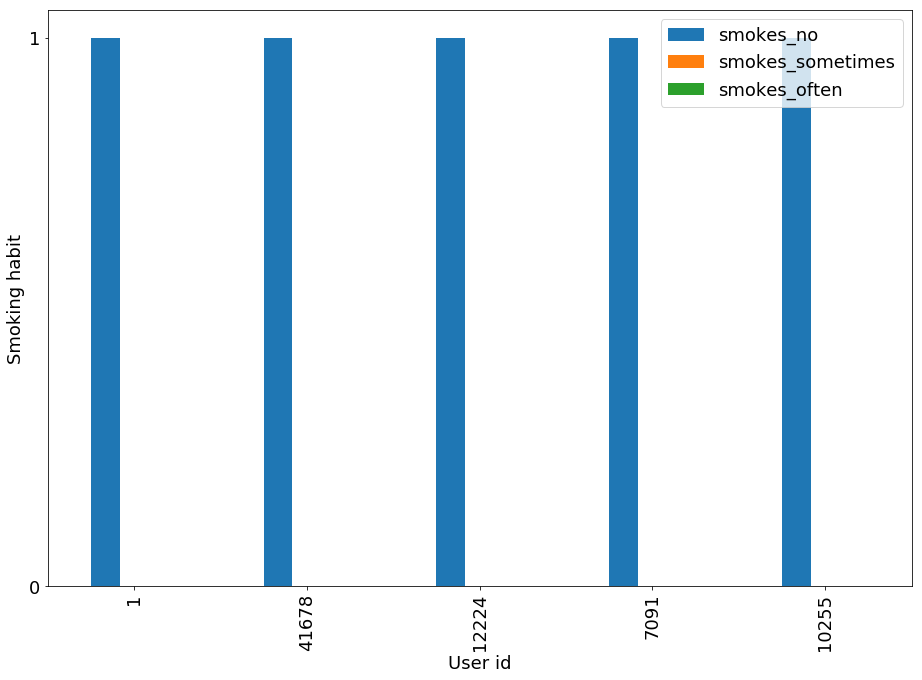

In [317]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=[ 'smokes_no',
       'smokes_sometimes', 'smokes_often'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Smoking habit')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

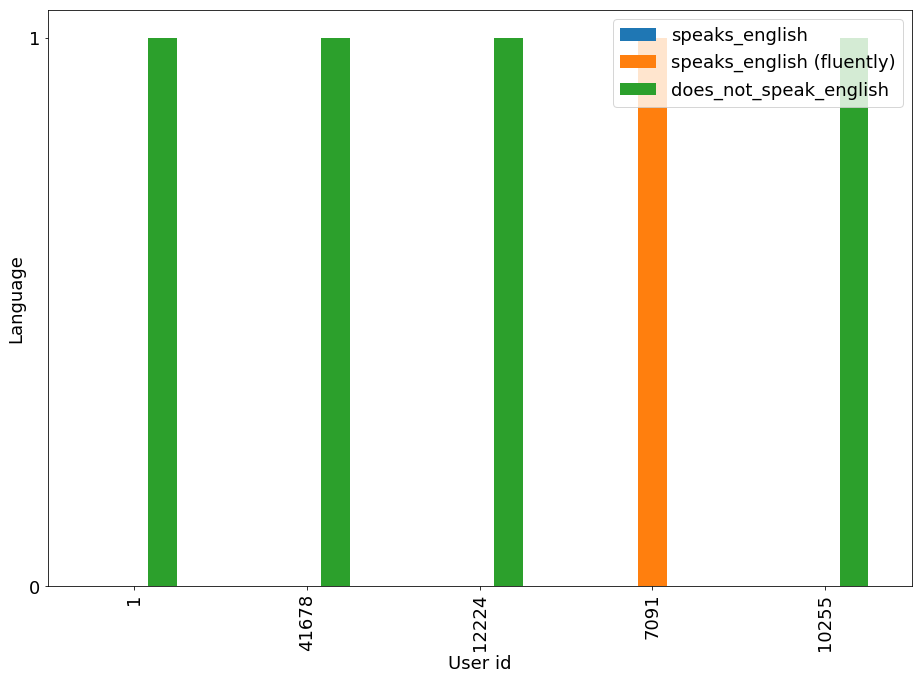

In [318]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=[ 'speaks_english', 'speaks_english (fluently)',
                               'does_not_speak_english'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Language')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()

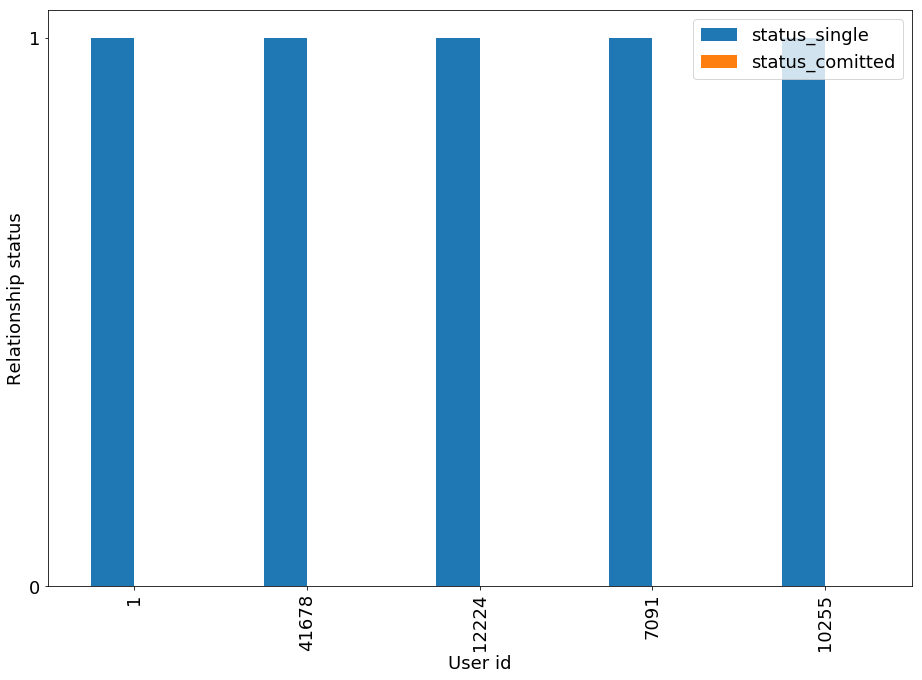

In [319]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

df_pred.plot(x='Unnamed: 0', y=['status_single', 'status_comitted'], kind='bar', ax=ax)

plt.xlabel('User id')

plt.ylabel('Relationship status')

plt.yticks(np.arange(0, 1+1, 1))

plt.show()